# DATA UNDERSTANDING PHASE :
##  EXPLORATORY DATA ANALYSIS

### Module mporting

In [207]:
def modulereload(package_name, module_name):
    import importlib
    module_path = f"{package_name}.{module_name}"
    
    try:
        module = importlib.import_module(module_path)
        print(f"Module '{module_path}' imported successfully.")
        importlib.reload(module)
        print(f"Module '{module_path}' reloaded.")
    except ImportError:
        print(f"Module '{module_path}' not found.")
        
import pandas as pd
# Set the palette for seaborn plots
custom_palette = sns.cubehelix_palette(start=0, rot=0.9, dark=0.1, light=0.8, n_colors=5, as_cmap=False)
sns.set_palette(custom_palette)
palette = sns.color_palette()

In [208]:
package_name = 'utils'
modulereload(package_name, 'essential')
modulereload(package_name, 'preparation')
modulereload(package_name, 'preparation_visualization')

from utils.essential import *
from utils.preparation import *
from utils.preparation_visualization import *

Module 'utils.essential' imported successfully.
Module 'utils.essential' reloaded.
Module 'utils.preparation' imported successfully.
Module 'utils.preparation' reloaded.
Module 'utils.preparation_visualization' imported successfully.
Module 'utils.preparation_visualization' reloaded.


## Data Description

 The data provided by the company consists of:
 - A dataset with historical data from clicked ads in csv format.

- Age: User's age
- Area Income: User's Average revenue 
- Daily Internet Usage: User's Daily average time on the internet (minutes)
- Category: Category of the advertisement
- City: City from which the user accessed the website 
- Male: Whether the user is a male or a female
- Country: User's country
- Timestamp: Time at which the user clicked on the ad or closed the window
- Clicked on Ad: Whether the user clicked on the ad (1) or did not (0).

As per the requirements, the focus of this phase will be on the folowing columns:

- Age
- Daily Internet Usage
- Daily Time Spent on Internet
- Clicked on Ad


## Data Loading

In [209]:
# Google Drive access - (Uncoment if required)
#drive.mount('/content/drive')

path_df_original = '../data/raw/clicked_ads_dataset.csv' # - (Ensure path is correct)
#Original Dataframe definition
df_original = pd.read_csv(path_df_original, low_memory=False)

## Initial data quality assesment

In [13]:
# Inspection of the first entries of the dataset
df_original.head(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [14]:
total_entries = df_original.shape[0]
total_columns = df_original.shape[1]
# Count number of columns
print('The number of columns in the original dataset is', total_columns)
# Count number of entres
print('The number of rows in the original dataset is', total_entries)

The number of columns in the original dataset is 11
The number of rows in the original dataset is 1000


In [15]:
duplicates = df_original.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicated rows:", num_duplicates)

Number of duplicated rows: 0


There are no duplicated rows, each row represents a user.

In [6]:
missing_values = df_original.isnull().sum()
total_values = df_original.size
total_missing = missing_values.sum()
percentage_missing_of_total = (total_missing / total_values) * 100

print("Number of missing values:", total_missing)
print(f"Percentage of missing values relative to total values: {percentage_missing_of_total}%")

Number of missing values: 40
Percentage of missing values relative to total values: 0.36363636363636365%


### Data Typing Quality Inspection

In [11]:
original_cat_binary, original_cat_other, original_temporal, original_numerical, original_fully_null, original_constant = type_columns(df_original)
original_categorical = join_column_lists(original_cat_binary, original_cat_other)
df_original_cat = df_original[original_categorical]
df_original_num = df_original[original_numerical]

In [19]:
table_title = ["Features by Data Type"]
column_titles = ["Fully Null", "Constant","Categorical: Binary", "Categorical: Other", "Temporal", "Numerical"]
print_table(table_title, column_titles,  original_fully_null, original_constant, original_cat_binary, original_cat_other, original_temporal, original_numerical)

| ['Features by Data Type']   |          |                     |                    |          |                          |
|:----------------------------|:---------|:--------------------|:-------------------|:---------|:-------------------------|
| Fully Null                  | Constant | Categorical: Binary | Categorical: Other | Temporal | Numerical                |
|                             |          |                     |                    |          |                          |
|                             |          | Clicked on Ad       | Male               |          | Age                      |
|                             |          |                     | Timestamp          |          | Area Income              |
|                             |          |                     | category           |          | Daily Internet Usage     |
|                             |          |                     | city               |          | Daily Time Spent on Site |
|       

- Most of the columns are numerical and non-binary categorical.
- There are no fully null columns nor constant columns.
- There is an evident mistyping.

#### Mistyping check

Inspecting a sample of a full row, the values and the data type of those values to see the mistyping clearly.

In [12]:
original_vt_valid_row = get_valid_row(df_original)
original_vt_cat = get_data_type_by_row(df_original, original_vt_valid_row, original_categorical)
original_vt_temp = get_data_type_by_row(df_original, original_vt_valid_row, original_temporal)
original_vt_num = get_data_type_by_row(df_original, original_vt_valid_row, original_numerical)

In [13]:
table_title = ['Sample of a complete row']
column_titles = ['Categorical', 'Temporal', 'Numerical']
print_table(table_title, column_titles, original_vt_cat, original_vt_temp, original_vt_num )

| ['Sample of a complete row']                     |          |                                           |
|:-------------------------------------------------|:---------|:------------------------------------------|
| Categorical                                      | Temporal | Numerical                                 |
|                                                  |          |                                           |
| Clicked on Ad: No (object)                       |          | Age: 35 (int64)                           |
| Male: Perempuan (object)                         |          | Area Income: 432837300.0 (float64)        |
| Timestamp: 3/27/2016 0:53 (object)               |          | Daily Internet Usage: 256.09 (float64)    |
| category: Furniture (object)                     |          | Daily Time Spent on Site: 68.95 (float64) |
| city: Jakarta Timur (object)                     |          | Unnamed: 0: 0 (int64)                     |
| province: Daerah Khusus Ib

The column `Timeframe` should be typed as a Datetime, it is temporal.

### Target Variable Inspection:
- The intended target of the model is the variable `Clicked on Ad`.

In [14]:
# Unique values of Target Variable with percentages
target_value_counts = df_original['Clicked on Ad'].value_counts()
percentages = (target_value_counts / len(df_original)) * 100

# Combine counts and percentages into a DataFrame
target_df = pd.DataFrame({
    'Clicked on Ad': target_value_counts.index,
    'Count': target_value_counts.values,
    'Percentage': percentages.values
})

# Display the DataFrame
print(target_df)

  Clicked on Ad  Count  Percentage
0            No    500        50.0
1           Yes    500        50.0


The target is a binary variable with two values: 0 and 1.
0 represents that the customer did not click on the ad.
1 represents that the customer clicked on the ad.

The target variable is already balanced, 0 and 1 are both 50%.

It should be noted that commonly the target variable is going to be unbalanced, cosidering how dynamic are the trends in digital marketing.

## Basic Data Quality Assessment

There can be features that have a high-cardinality, high missing values (70% or more) or features that are irrelevant.

In [15]:
unnecessary_categorical = []
unnecessary_numerical = []

#### Categorical Data

##### High Cardinality Check

In [19]:
# High Cardinality Check
total_rows = len(df_original)
cardinality_threshold = 0.01  # You can adjust this threshold as needed
high_cardinality = []
for col in df_original_cat.columns:
    unique_values = df_original_cat[col].nunique()
    value_counts = df_original_cat[col].value_counts()
    if len(value_counts) / total_rows > cardinality_threshold:
        high_cardinality.append(col)
        print(f"High Cardinality Detected in {col} | {unique_values} different categories")

High Cardinality Detected in Timestamp | 997 different categories
High Cardinality Detected in city | 30 different categories
High Cardinality Detected in province | 16 different categories


##### Class Dominance Check

In [20]:
import pandas as pd

def find_columns_with_dominant_class(df, threshold=0.8):
    dominant_columns = []

    for column in df.columns:
        value_counts = df[column].value_counts(normalize=True)
        top_class = value_counts.index[0]
        top_class_percentage = value_counts.iloc[0]

        if top_class_percentage >= threshold:
            dominant_columns.append((column, top_class, top_class_percentage))

    return dominant_columns


result = find_columns_with_dominant_class(df_original_cat, threshold=0.6)
for column, top_class, top_class_percentage in result:
    print(f"Column '{column}' has a dominant class '{top_class}' with {top_class_percentage*100:.2f}% of the values.")


There isn't really any dominant class present, it is a balanced dataset in general.

Numerical Data

In [75]:
df_original_num.columns

Index(['Age', 'Area Income', 'Daily Internet Usage',
       'Daily Time Spent on Site', 'Unnamed: 0'],
      dtype='object')

As seen before, each user is represented by a numerical Id, in the column `Unnamed:0`, because of that this numerical column is unnecessary.

In [21]:
df_original['Unnamed: 0'].value_counts()

Unnamed: 0
0      1
671    1
658    1
659    1
660    1
      ..
338    1
339    1
340    1
341    1
999    1
Name: count, Length: 1000, dtype: int64

In [22]:
unnecessary_numerical = ['Unnamed: 0']

#### Missing Values by Data Type

##### Missing values check (Categorical)

In [76]:
# Calculate the missing percentages and get the data lists
potential_missing_cat = exclude_elements(original_categorical, unnecessary_categorical)
df_potential_missing_cat = df_basic[potential_missing_cat]
cat_low_col, cat_low_val, cat_high_col, cat_high_val = calculate_missing_percentages(df_potential_missing_cat, 60)
table_title = ["Rest of Categorical Columns by Missing Data %"]
column_titles = ["Low-Moderate % of Missing Values", '0-69%', '', "High % of Missing Values", "70-99%"]
print_table(table_title, column_titles, cat_low_col, cat_low_val, '', cat_high_col, cat_high_val)


| ['Rest of Categorical Columns by Missing Data %']   |       |    |                          |        |
|:----------------------------------------------------|:------|:---|:-------------------------|:-------|
| Low-Moderate % of Missing Values                    | 0-69% |    | High % of Missing Values | 70-99% |
|                                                     |       |    |                          |        |
| Clicked on Ad                                       | 0.0   |    |                          |        |
| Male                                                | 0.0   |    |                          |        |
| Timestamp                                           | 0.0   |    |                          |        |
| category                                            | 0.0   |    |                          |        |
| city                                                | 0.0   |    |                          |        |
| province                                            |

From the categorical features that are not unnnecesary there are not any features with missing values.

##### Missing values check (Numerical)

In [79]:
potential_missing_num = exclude_elements(original_numerical, unnecessary_numerical)
df_potential_missing_num = df_basic[potential_missing_num]
num_low_col, num_low_val, num_high_col, num_high_val = calculate_missing_percentages(df_potential_missing_num, 70)
table_title = ["Numerical by  Columns Data %"]
column_titles = ["Low-Moderate % of Missing Values", '0-69%', '', "High % of Missing Values", "70% - 99%"]
print_table(table_title, column_titles, num_low_col, num_low_val, '', num_high_col, num_high_val)

| ['Numerical by  Columns Data %']   |       |    |                          |           |
|:-----------------------------------|:------|:---|:-------------------------|:----------|
| Low-Moderate % of Missing Values   | 0-69% |    | High % of Missing Values | 70% - 99% |
|                                    |       |    |                          |           |
| Area Income                        | 1.0   |    |                          |           |
| Daily Internet Usage               | 1.0   |    |                          |           |
| Daily Time Spent on Site           | 1.0   |    |                          |           |
| Age                                | 0.0   |    |                          |           |


There are missing values in the following columns, which will be be treated during Data Cleansing.

In [80]:
missing_numerical = []
low_part_null_num = columns_within_threshold(num_low_col, num_low_val, 0, 70)
missing_numerical = join_column_lists(missing_numerical, low_part_null_num)
print(missing_numerical)

['Area Income', 'Daily Internet Usage', 'Daily Time Spent on Site']


To proceed with the data analysis and maintain naming consistency, some columns will be renamed. Because now the dataframe will be modified it is better to work on a copy.
  

In [210]:
df = df_original.copy()

In [211]:
df.rename(columns={"category": "Category"}, inplace=True)
df.rename(columns={"city": "City"}, inplace=True)
df.rename(columns={"Male": "Sex"}, inplace=True)
df.rename(columns={"province": "Province"}, inplace=True)

## Exploratory Data Analysis

In [212]:
cat_binary, cat_other, temporal, numerical = type_columns(df,True)
categorical = join_column_lists(cat_binary, cat_other)

### Statistical Summary 

In [20]:
df[categorical].describe()

,Clicked on Ad,Category,City,Province,Sex,Timestamp
count,1000,1000,1000,1000,997,1000
unique,2,10,30,16,2,997
top,No,Otomotif,Surabaya,Daerah Khusus Ibukota Jakarta,Perempuan,5/26/2016 15:40
freq,500,112,64,253,518,2


In [282]:
df[numerical].describe()

,Age,Area Income,Daily Internet Usage,Daily Time Spent on Site,Unnamed: 0
count,1000.000000,9.870000e+02,989.000000,987.000000,1000.000000
mean,36.009000,3.848647e+08,179.863620,64.929524,499.500000
std,8.785562,9.407999e+07,43.870142,15.844699,288.819436
min,19.000000,9.797550e+07,104.780000,32.600000,0.000000
25%,29.000000,3.286330e+08,138.710000,51.270000,249.750000
50%,35.000000,3.990683e+08,182.650000,68.110000,499.500000
75%,42.000000,4.583554e+08,218.790000,78.460000,749.250000
max,61.000000,5.563936e+08,267.010000,91.430000,999.000000


### Univariate Analysis

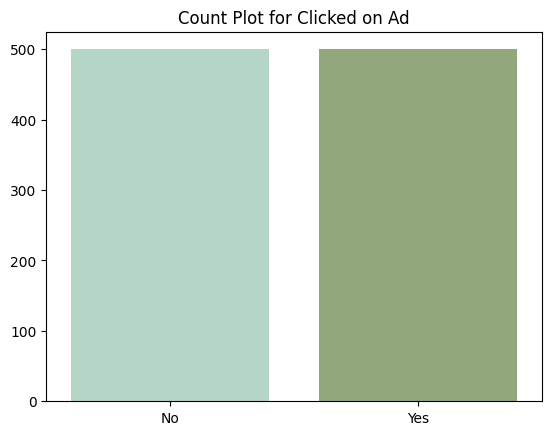

In [213]:
custom_countplot(df_original, x='Clicked on Ad')


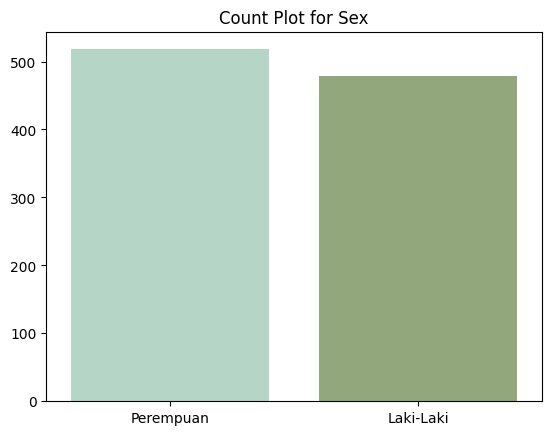

In [214]:
custom_countplot(df, x='Sex')

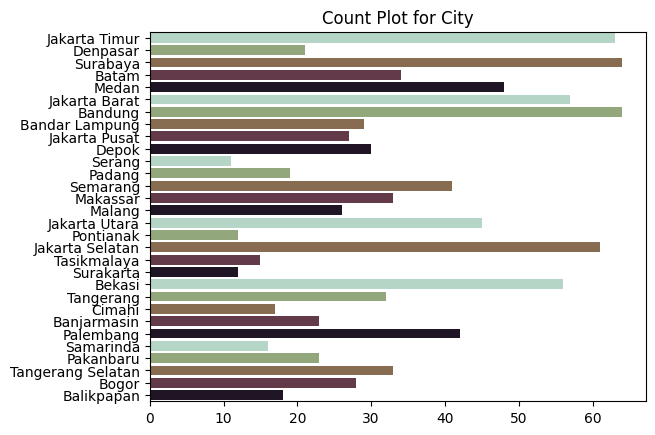

In [215]:
custom_countplot(df, y='City')
plt.show()

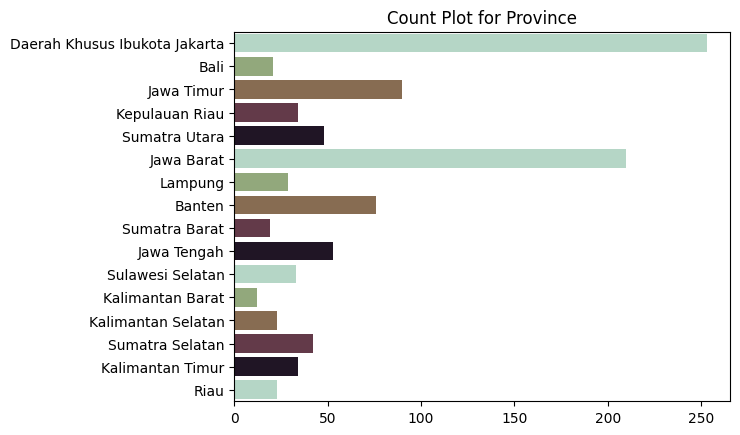

In [192]:
custom_countplot(df, y='Province')
plt.show() 

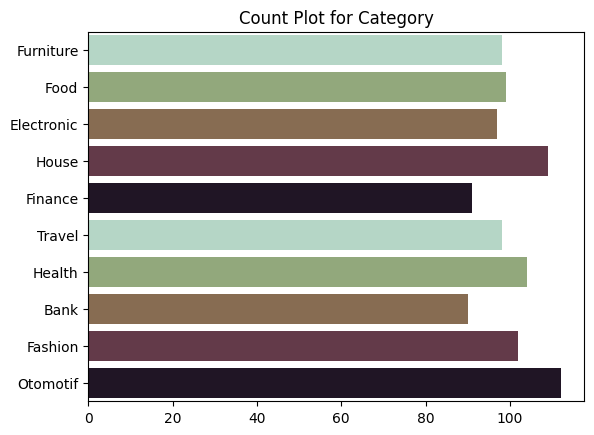

In [193]:
custom_countplot(df, y='Category')

Numerical features

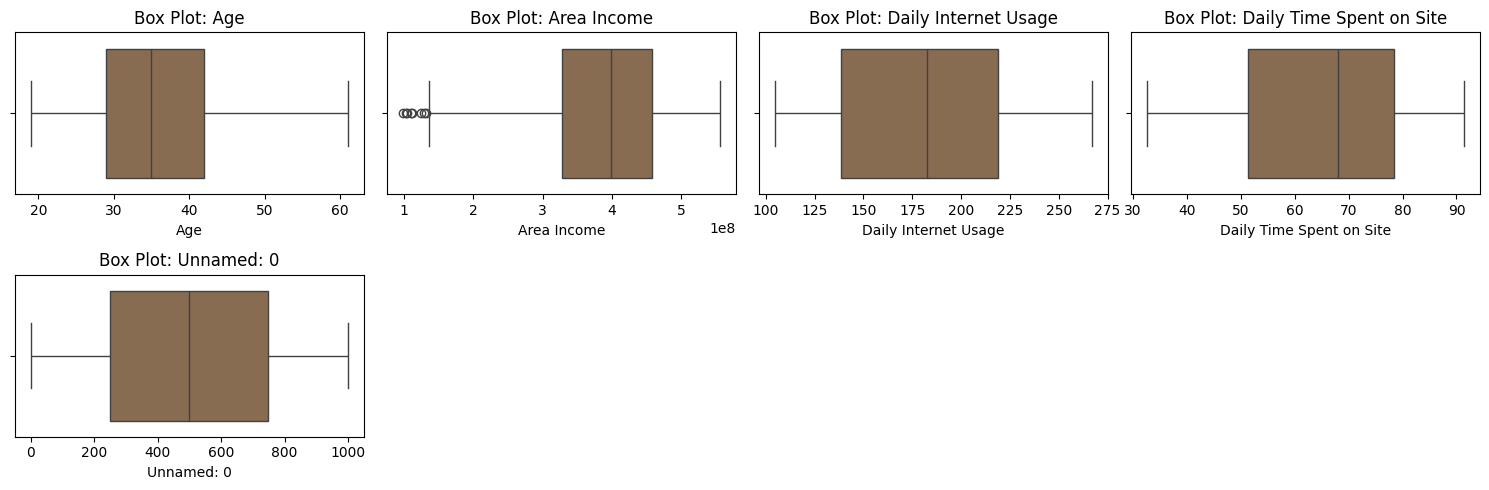

In [194]:
cols_to_plot = numerical
custom_function = custom_boxplot

withingrid_function_per_cols(df, cols_to_plot, custom_function, figsize=(15, 5))

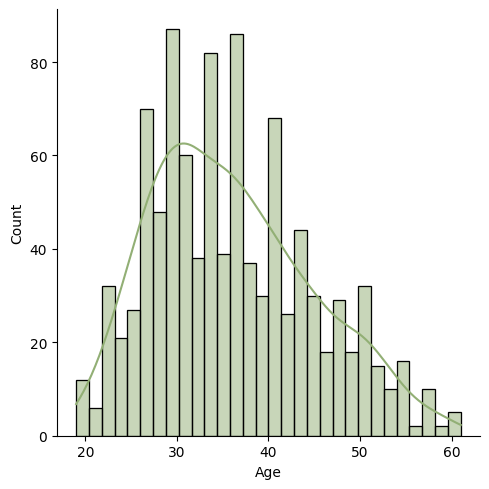

In [195]:
custom_displot(df, 'Age', title='Age Distribution', xlabel='Age', ylabel='Frequency', color=palette[1])
plt.show()

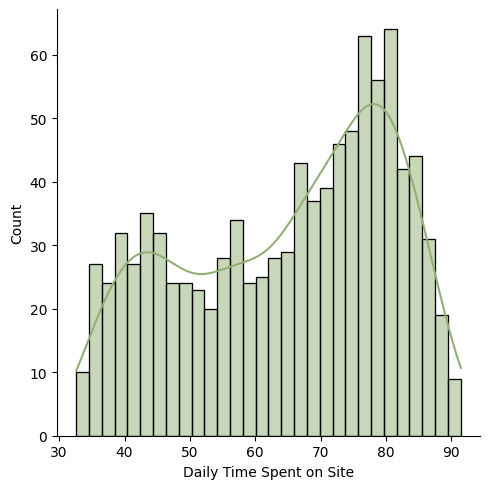

In [180]:
custom_displot(df, 'Daily Time Spent on Site', title='Daily Time Spent on Site Distribution', xlabel='Daily Time Spent on Site', ylabel='Frequency', color=palette[1])
plt.show()

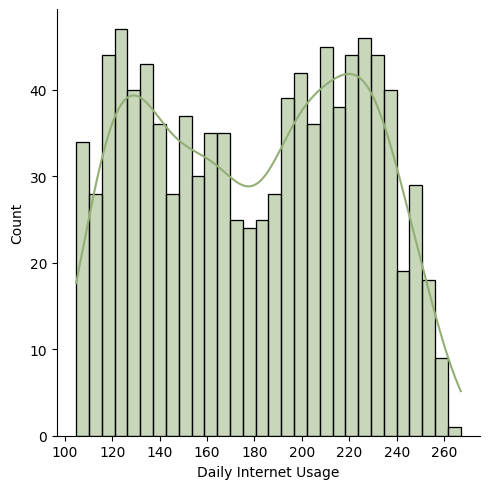

In [179]:
custom_displot(df, 'Daily Internet Usage', title='Daily Internet Usage Distribution', xlabel='Daily Internet Usage', ylabel='Frequency', color=palette[1])
plt.show()

## Bivariate Analysis

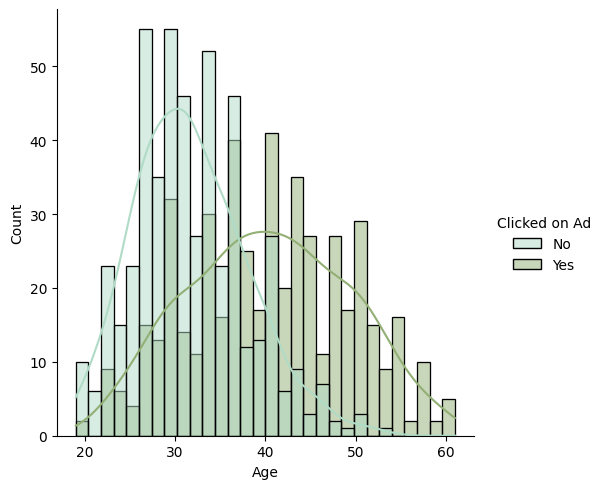

In [171]:
custom_displot(df, 'Age', hue='Clicked on Ad')

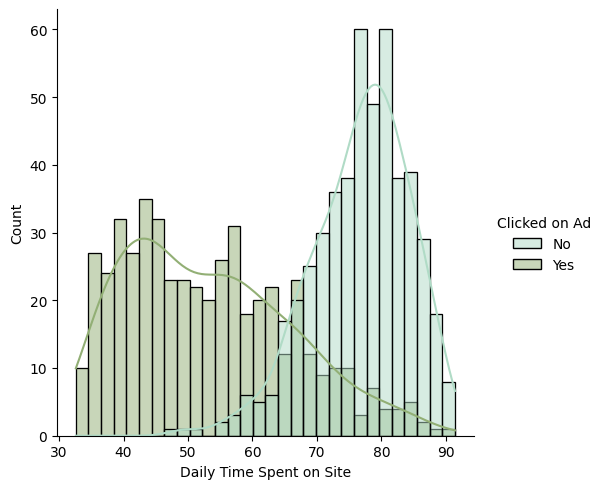

In [170]:
custom_displot(df, 'Daily Time Spent on Site', hue='Clicked on Ad')

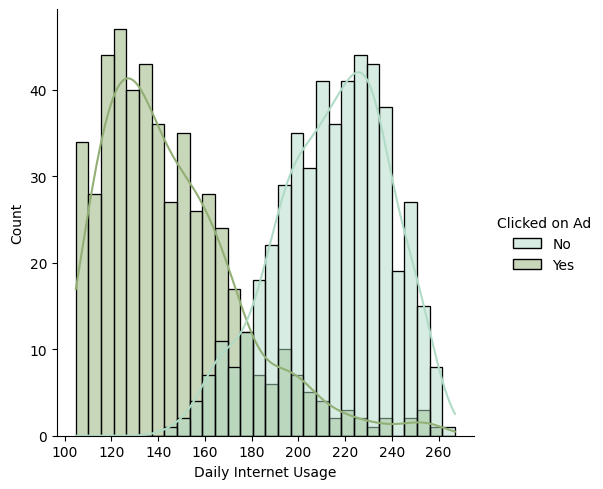

In [169]:
custom_displot(df, 'Daily Internet Usage', hue='Clicked on Ad', title='Daily Time Spent on Site Distribution (Clicked on Ad')

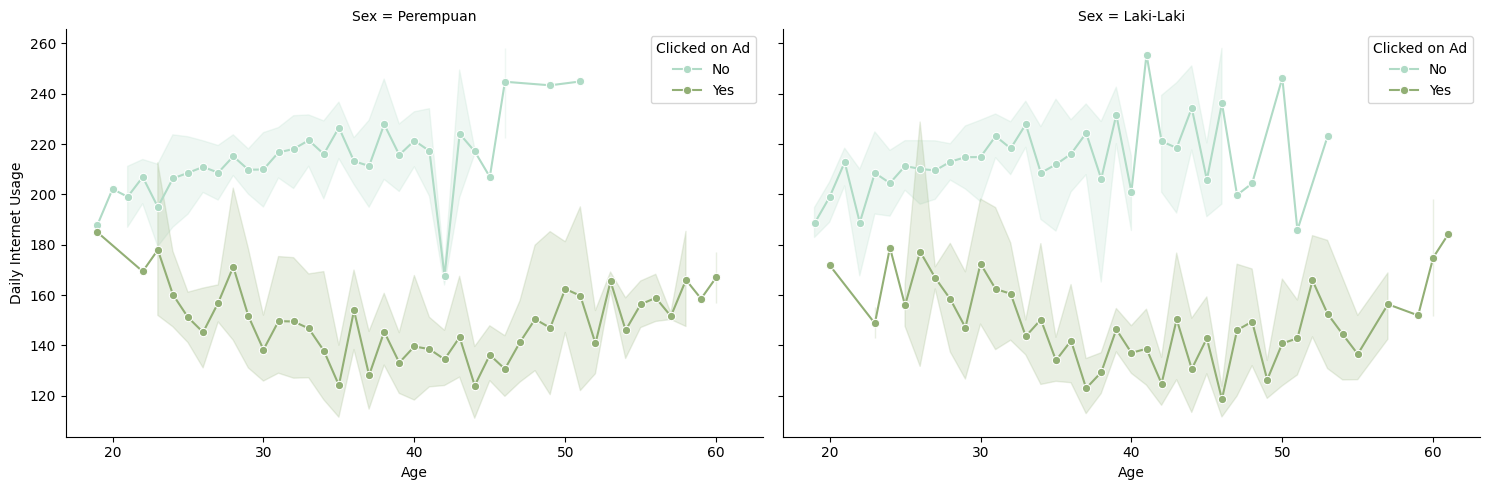

In [216]:
custom_relplot(df, x='Age', y='Daily Internet Usage', hue='Clicked on Ad', subvalue='Sex', kind='line', marker='o', direction='col')

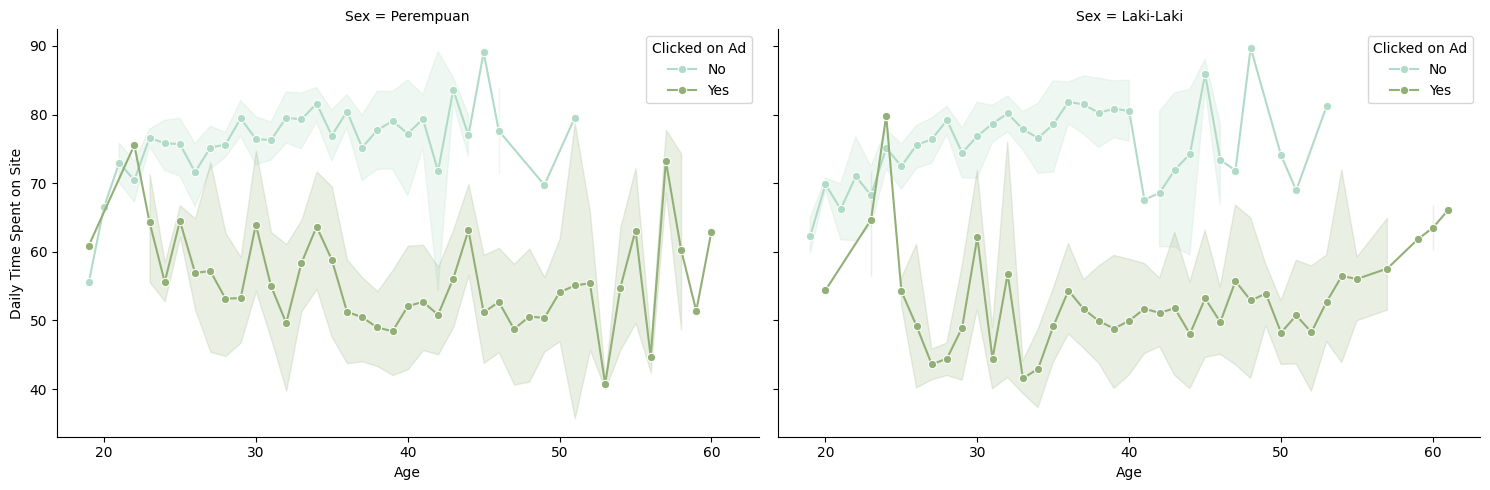

In [166]:
custom_relplot(df, x='Age', y='Daily Time Spent on Site', hue='Clicked on Ad', subvalue='Sex', kind='line', marker='o', direction='col')

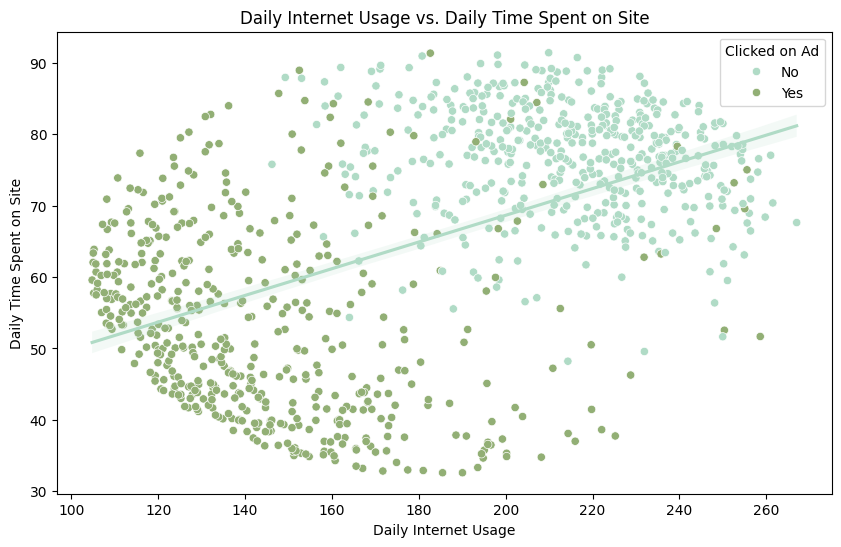

In [206]:
plt.figure(figsize=(10, 6))
custom_scatterplot(df, x_col='Daily Internet Usage', y_col='Daily Time Spent on Site', hue='Clicked on Ad', title='Daily Internet Usage vs. Daily Time Spent on Site', xlabel='Daily Internet Usage', ylabel='Daily Time Spent on Site')
plt.show()

# Multivariate Analysis

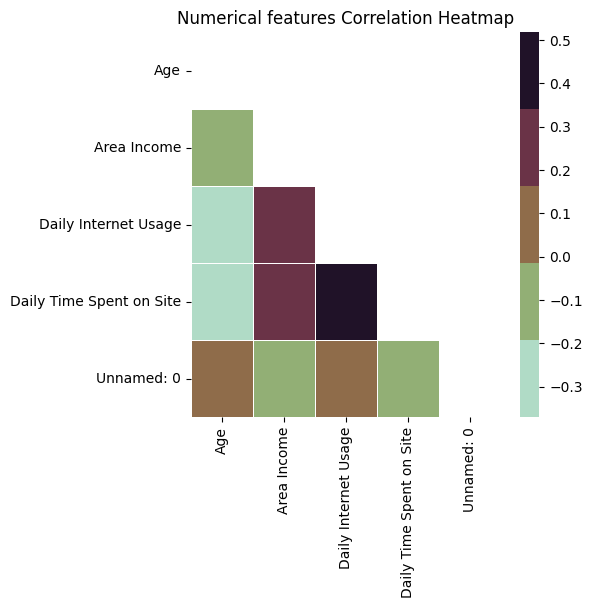

In [205]:
plt.figure(figsize=(5, 5))
ax = plt.gca()
corr_matrix = custom_heatmap(df[numerical], ax)
plt.title("Numerical features Correlation Heatmap")
plt.show()

For numerical features the highest correlation, but not indicating any need to drop those features, can be seen between `Daily Internet Usage` and `Daily Time Spent on Site` 

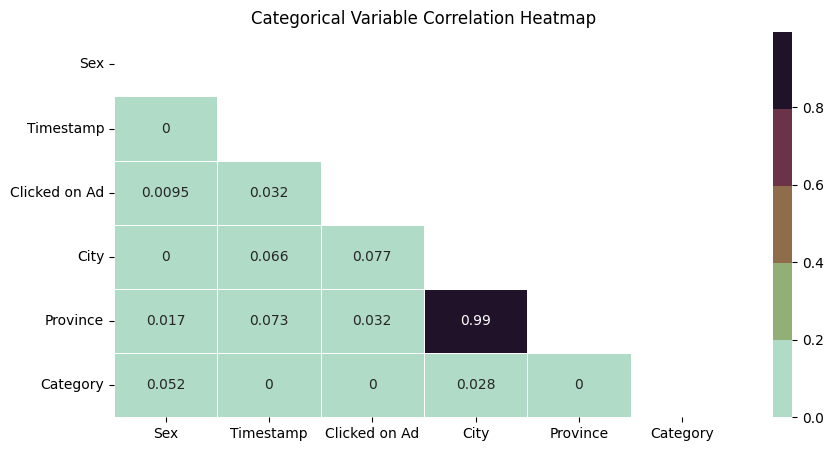

In [217]:
# Select categorical variables
categorical_variables = df.select_dtypes(include=['object']).columns

# Create an empty correlation matrix
correlation_matrix = pd.DataFrame(index=categorical_variables, columns=categorical_variables)

# Calculate Cramér's V for each pair of categorical variables
for var1 in categorical_variables:
    for var2 in categorical_variables:
        if var1 != var2:
            correlation = cramers_v(df, var1, var2)
            correlation_matrix.at[var1, var2] = correlation

# Convert the correlation matrix to float
correlation_matrix = correlation_matrix.astype(float)

# Create a heatmap for the categorical variable correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, cmap=palette, annot=True, linewidth=.5, mask=mask)
plt.title("Categorical Variable Correlation Heatmap")
plt.show()

Province and City have a very high correlation

# NEXT: DATA PREPARATION PHASE

In [219]:
# Save the improved DataFrame to a CSV file
path_df_improved = '../data/1-improved/clicked_ads_dataset.csv' # - (Ensure path is correct)
df.to_csv(path_df_improved, index=False)

- There is no duplicated data so no treatment is necessary.
- Models robust to outliers will be used during modeling so there is no need to handle outlers.